In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Step 1: Creación de data set
np.random.seed(42)
data = {
    'EmployeeID': range(1, 101),
    'Age': np.random.randint(20, 60, 100),
    'Department': np.random.choice(['HR', 'IT', 'Finance', 'Marketing', 'Sales'], 100),
    'MonthlyIncome': np.random.randint(3000, 12000, 100),
    'JobSatisfaction': np.random.choice([1, 2, 3, 4], 100),
    'YearsAtCompany': np.random.randint(0, 20, 100),
    'Attrition': np.random.choice(['Yes', 'No'], 100, p=[0.2, 0.8]),
    'EducationLevel': np.random.choice([1, 2, 3, 4, 5], 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
}
df = pd.DataFrame(data)

In [56]:
# Introducir valores faltantes
missing_indices_income = np.random.choice(df.index, 10, replace=False)
df.loc[missing_indices_income, 'MonthlyIncome'] = np.nan
missing_indices_department = np.random.choice(df.index, 5, replace=False)
df.loc[missing_indices_department, 'Department'] = np.nan

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EmployeeID       100 non-null    int64  
 1   Age              100 non-null    int64  
 2   Department       95 non-null     object 
 3   MonthlyIncome    90 non-null     float64
 4   JobSatisfaction  100 non-null    int64  
 5   YearsAtCompany   100 non-null    int64  
 6   Attrition        100 non-null    object 
 7   EducationLevel   100 non-null    int64  
 8   Gender           100 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 7.2+ KB


In [58]:
df.head()

,EmployeeID,Age,Department,MonthlyIncome,JobSatisfaction,YearsAtCompany,Attrition,EducationLevel,Gender
0,1,58,Sales,7282.0,4,19,Yes,5,Female
1,2,48,Finance,5511.0,2,15,No,2,Male
2,3,34,Marketing,3659.0,1,12,No,4,Male
3,4,27,Finance,5811.0,2,17,No,4,Male
4,5,40,Finance,10098.0,3,9,No,2,Male


#**IMPUTACIÓN DE VALORES FALTANTES**

In [59]:
# Step 2: Analizar valores faltantes
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("Missing values analysis completed.")


--- Missing Values ---
EmployeeID          0
Age                 0
Department          5
MonthlyIncome      10
JobSatisfaction     0
YearsAtCompany      0
Attrition           0
EducationLevel      0
Gender              0
dtype: int64
Missing values analysis completed.


In [60]:
df.isnull().sum()

,0
EmployeeID,0
Age,0
Department,5
MonthlyIncome,10
JobSatisfaction,0
YearsAtCompany,0
Attrition,0
EducationLevel,0
Gender,0


<Axes: >

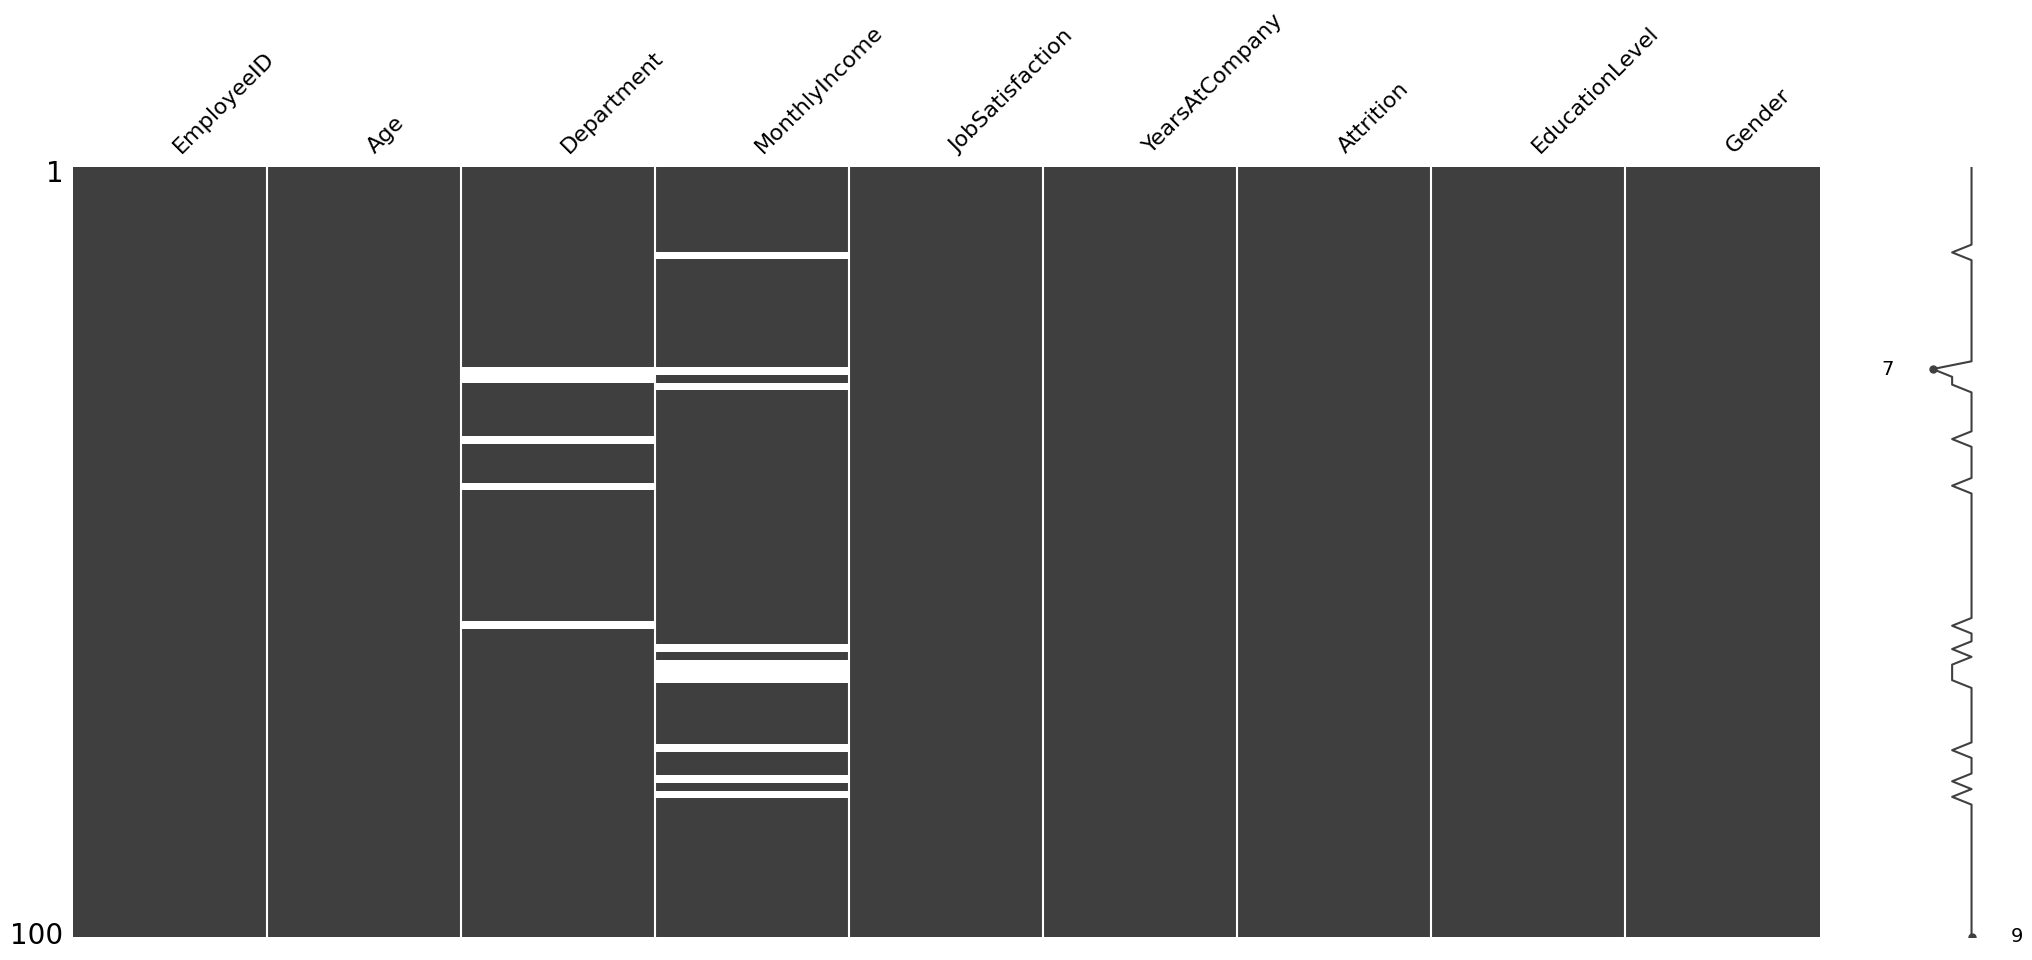

In [61]:
import missingno as msno
msno.matrix(df)

In [62]:
# Imputación de valores faltantes
def impute_missing_values():
    print("\n--- Imputación de valores faltantes ---")
    print("Antes de la imputación:")
    print(df.isnull().sum())

    # Imputación de valores faltantes en variable numérica con mean
    df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

    # Imputación de valores faltantes en variable categórica con moda
    df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

    print("Después de la imputación:")
    print(df.isnull().sum())
    print("Imputación de valores faltantes completada.")

impute_missing_values()


--- Imputación de valores faltantes ---
Antes de la imputación:
EmployeeID          0
Age                 0
Department          5
MonthlyIncome      10
JobSatisfaction     0
YearsAtCompany      0
Attrition           0
EducationLevel      0
Gender              0
dtype: int64
Después de la imputación:
EmployeeID         0
Age                0
Department         0
MonthlyIncome      0
JobSatisfaction    0
YearsAtCompany     0
Attrition          0
EducationLevel     0
Gender             0
dtype: int64
Imputación de valores faltantes completada.


#**ESTADÍSTICA DESCRIPTIVA**

In [63]:
# Step 3: Estadística descriptiva
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))
print("Descriptive statistics computation completed.")


--- Descriptive Statistics ---
        EmployeeID         Age Department  MonthlyIncome  JobSatisfaction  \
count   100.000000  100.000000        100     100.000000        100.00000   
unique         NaN         NaN          5            NaN              NaN   
top            NaN         NaN         HR            NaN              NaN   
freq           NaN         NaN         29            NaN              NaN   
mean     50.500000   38.790000        NaN    7051.222222          2.58000   
std      29.011492   11.556008        NaN    2307.800404          1.06534   
min       1.000000   20.000000        NaN    3098.000000          1.00000   
25%      25.750000   28.000000        NaN    5242.500000          2.00000   
50%      50.500000   39.500000        NaN    7051.222222          2.50000   
75%      75.250000   47.250000        NaN    8714.000000          4.00000   
max     100.000000   59.000000        NaN   11754.000000          4.00000   

        YearsAtCompany Attrition  Education

In [64]:
# Estadísticas descriptivas
df.describe()

,EmployeeID,Age,MonthlyIncome,JobSatisfaction,YearsAtCompany,EducationLevel
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,38.790000,7051.222222,2.58000,9.110000,2.970000
std,29.011492,11.556008,2307.800404,1.06534,6.208328,1.507255
min,1.000000,20.000000,3098.000000,1.00000,0.000000,1.000000
25%,25.750000,28.000000,5242.500000,2.00000,3.000000,2.000000
50%,50.500000,39.500000,7051.222222,2.50000,9.000000,3.000000
75%,75.250000,47.250000,8714.000000,4.00000,15.000000,4.250000
max,100.000000,59.000000,11754.000000,4.00000,19.000000,5.000000


In [65]:
# Estadísticas descriptivas transpuestas de variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,100.0,50.500000,29.011492,1.0,25.75,50.500000,75.25,100.0
Age,100.0,38.790000,11.556008,20.0,28.00,39.500000,47.25,59.0
MonthlyIncome,100.0,7051.222222,2307.800404,3098.0,5242.50,7051.222222,8714.00,11754.0
JobSatisfaction,100.0,2.580000,1.065340,1.0,2.00,2.500000,4.00,4.0
YearsAtCompany,100.0,9.110000,6.208328,0.0,3.00,9.000000,15.00,19.0
EducationLevel,100.0,2.970000,1.507255,1.0,2.00,3.000000,4.25,5.0


In [69]:
# Exportar estadísticas descriptivas en excel
df.describe().T.to_excel('Estadística Descriptiva ejemplo.xlsx', sheet_name='Descriptive Statistics')

# Descargar archivo en excel
from google.colab import files
files.download('Estadística Descriptiva ejemplo.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
# Step 4: Estadística descriptiva de variables numéricas
print("\n--- Descriptive Statistics for Categorical Variables ---")

categorical_cols = ['Department', 'Attrition', 'Gender', 'JobSatisfaction', 'EducationLevel']

for col in categorical_cols:
    print(f"\nDescriptive Statistics for '{col}':")
    print(df[col].value_counts())  # Frequency counts
    print(df[col].value_counts(normalize=True) * 100)  # Percentage
    print(f"Unique values: {df[col].unique()}") # Unique values
    print(f"Mode: {df[col].mode()[0]}") # Mode


--- Descriptive Statistics for Categorical Variables ---

Descriptive Statistics for 'Department':
Department
HR           29
Finance      21
Marketing    20
Sales        16
IT           14
Name: count, dtype: int64
Department
HR           29.0
Finance      21.0
Marketing    20.0
Sales        16.0
IT           14.0
Name: proportion, dtype: float64
Unique values: ['Sales' 'Finance' 'Marketing' 'HR' 'IT']
Mode: HR

Descriptive Statistics for 'Attrition':
Attrition
No     86
Yes    14
Name: count, dtype: int64
Attrition
No     86.0
Yes    14.0
Name: proportion, dtype: float64
Unique values: ['Yes' 'No']
Mode: No

Descriptive Statistics for 'Gender':
Gender
Male      52
Female    48
Name: count, dtype: int64
Gender
Male      52.0
Female    48.0
Name: proportion, dtype: float64
Unique values: ['Female' 'Male']
Mode: Male

Descriptive Statistics for 'JobSatisfaction':
JobSatisfaction
2    32
4    26
3    24
1    18
Name: count, dtype: int64
JobSatisfaction
2    32.0
4    26.0
3    24.0
1   


--- Univariate Analysis ---
Generating histograms for numerical variables.


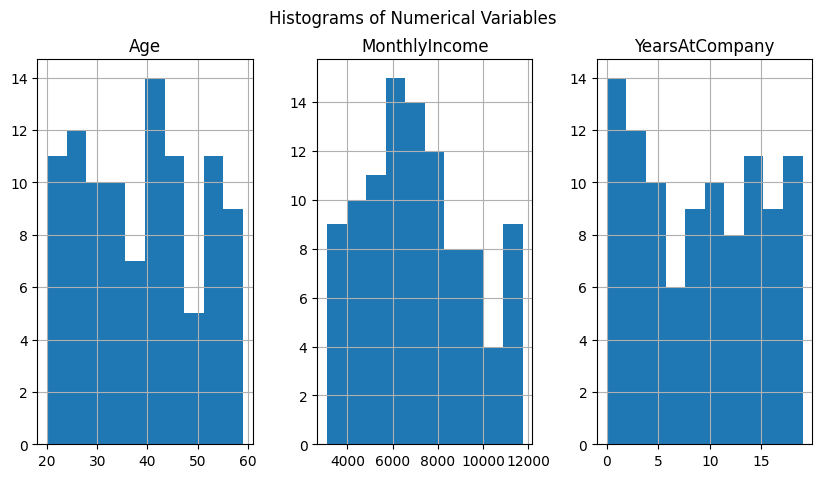

Generating count plot for Department.


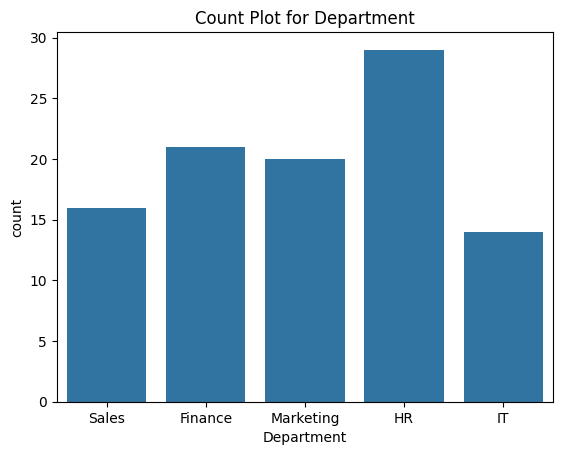

Generating count plot for JobSatisfaction.


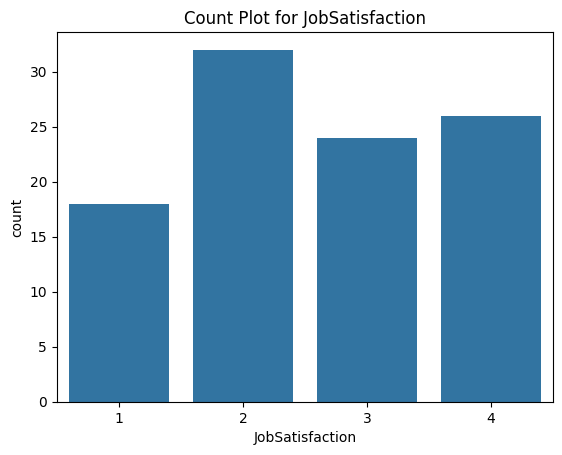

Generating count plot for Attrition.


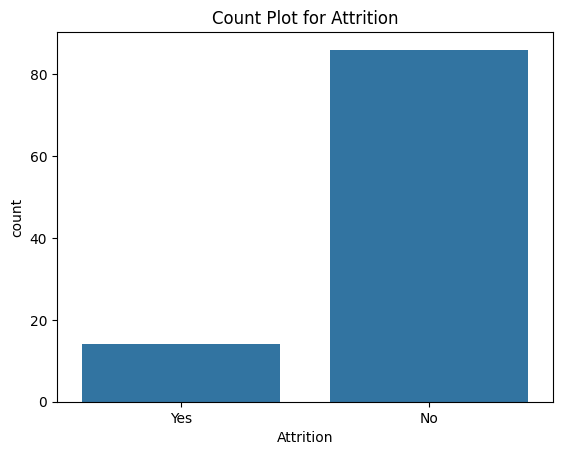

Generating count plot for Gender.


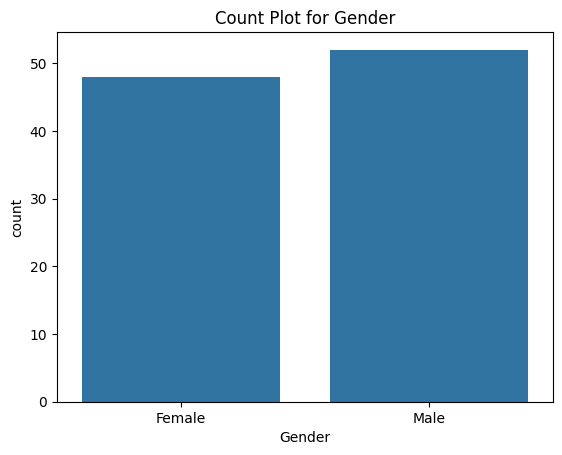

Univariate analysis completed.


In [72]:
# Step 6: Análisis univariado
def univariate_analysis():
    print("\n--- Univariate Analysis ---")
    # Numerical Variables
    print("Generating histograms for numerical variables.")
    df[['Age', 'MonthlyIncome', 'YearsAtCompany']].hist(bins=10, figsize=(10, 5), layout=(1, 3))
    plt.suptitle('Histograms of Numerical Variables')
    plt.show()

    # Categorical Variables
    for col in ['Department', 'JobSatisfaction', 'Attrition', 'Gender']:
        print(f"Generating count plot for {col}.")
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot for {col}')
        plt.show()

    print("Univariate analysis completed.")

univariate_analysis()

Generating count plot for Department.


<ipython-input-73-fbf892dc932c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")  # Change color palette here


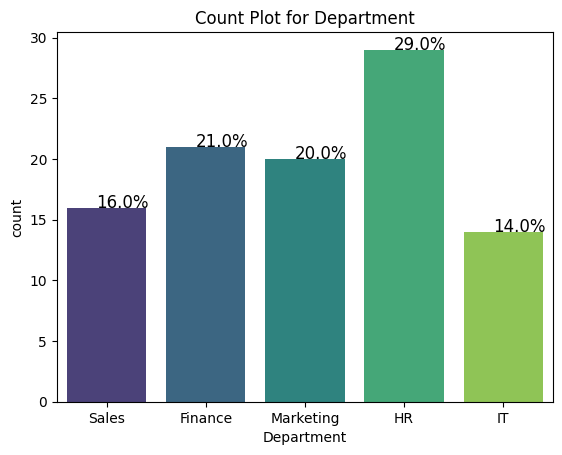

Generating count plot for JobSatisfaction.


<ipython-input-73-fbf892dc932c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")  # Change color palette here


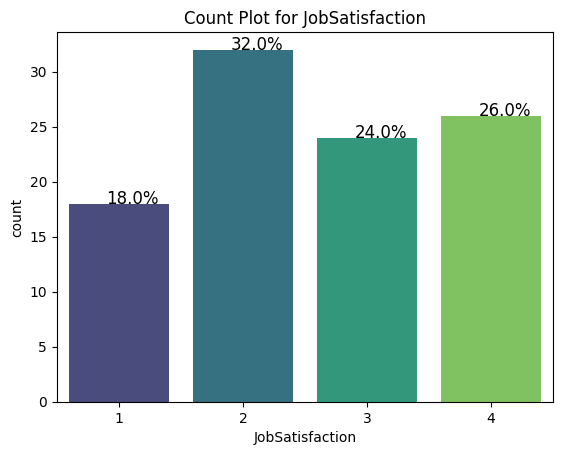

Generating count plot for Attrition.


<ipython-input-73-fbf892dc932c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")  # Change color palette here


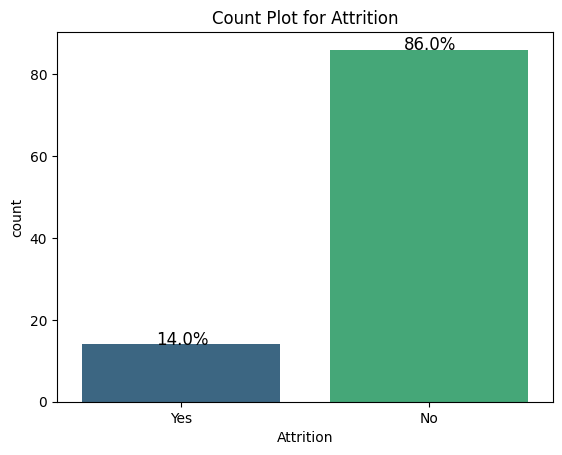

Generating count plot for Gender.


<ipython-input-73-fbf892dc932c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="viridis")  # Change color palette here


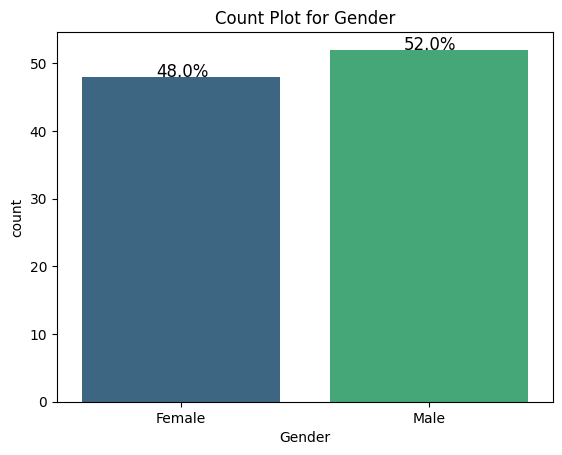

In [73]:
# Categorical Variables
for col in ['Department', 'JobSatisfaction', 'Attrition', 'Gender']:
    print(f"Generating count plot for {col}.")

    # Create the countplot
    ax = sns.countplot(data=df, x=col, palette="viridis")  # Change color palette here

    # Calculate percentages and add them as text above the bars
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1  # Adjust text position if needed
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)  # Add percentage text

    plt.title(f'Count Plot for {col}')
    plt.show()


--- Bivariate Analysis ---
Generating scatter plot for Age vs Monthly Income.


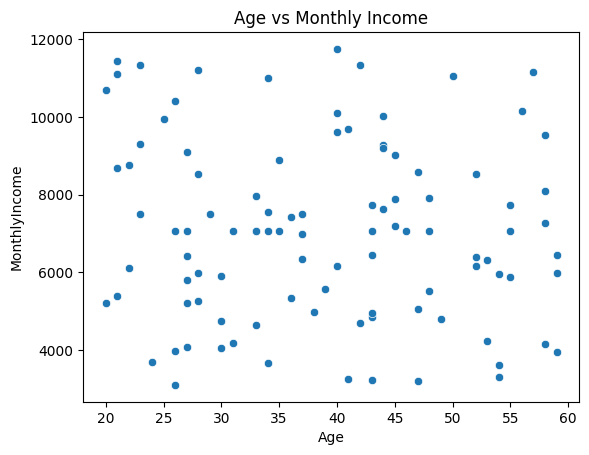

Generating box plot for Monthly Income by Attrition.


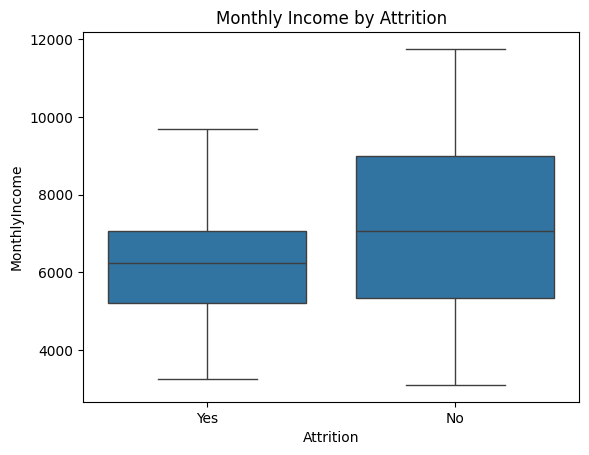

Generating box plot for Years at Company by Department.


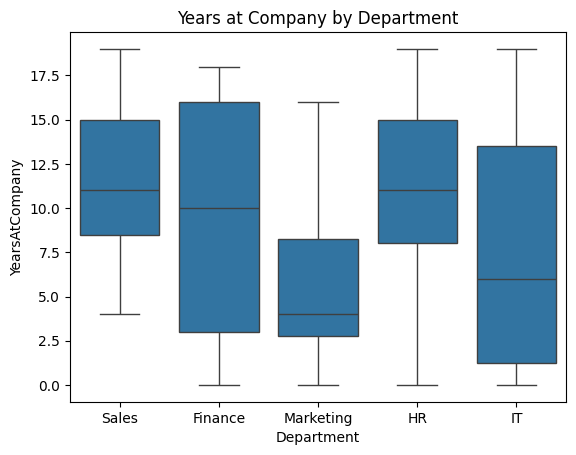

Generating correlation heatmap.


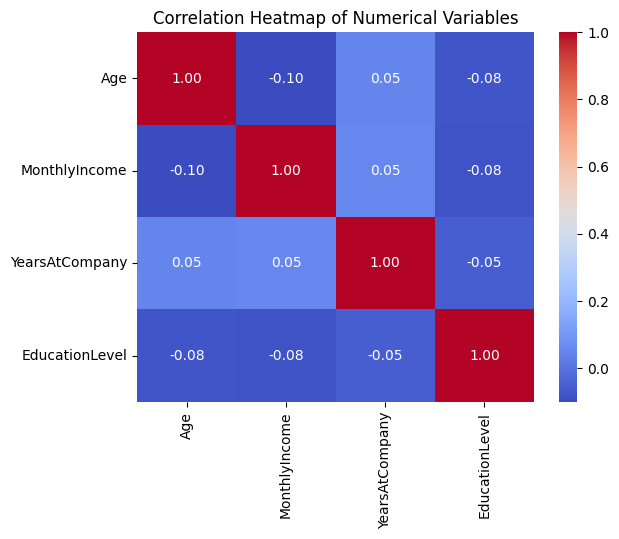

Bivariate analysis completed.


In [78]:
# Step 7: Analisis Bivariado
def bivariate_analysis():
    print("\n--- Bivariate Analysis ---")
    # Numerical vs Numerical
    print("Generating scatter plot for Age vs Monthly Income.")
    sns.scatterplot(data=df, x='Age', y='MonthlyIncome')
    plt.title('Age vs Monthly Income')
    plt.show()

    # Numerical vs Categorical
    print("Generating box plot for Monthly Income by Attrition.")
    sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
    plt.title('Monthly Income by Attrition')
    plt.show()

    print("Generating box plot for Years at Company by Department.")
    sns.boxplot(data=df, x='Department', y='YearsAtCompany')
    plt.title('Years at Company by Department')
    plt.show()

    # Correlation Heatmap
    print("Generating correlation heatmap.")
    numerical_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'EducationLevel']
    correlation = df[numerical_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()

    print("Bivariate analysis completed.")

bivariate_analysis()


<Axes: >

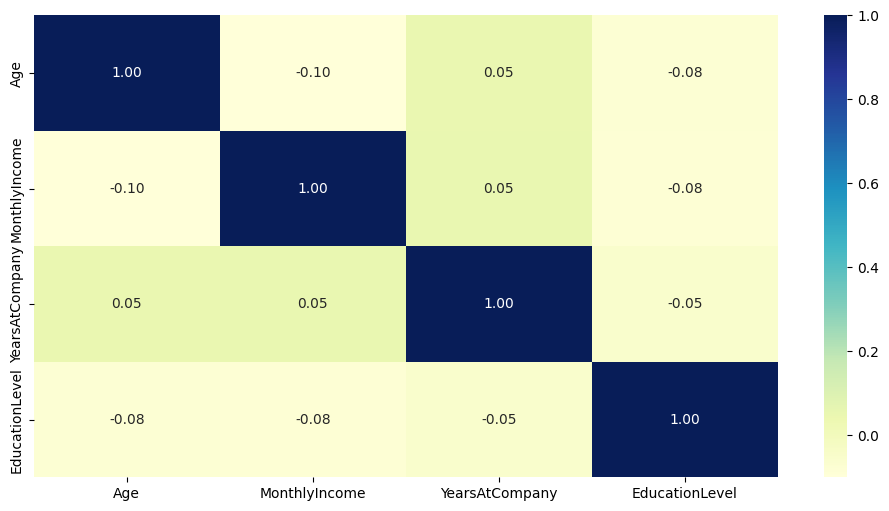

In [81]:
numerical_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'EducationLevel']
plt.figure(figsize = (12, 6))
sns.heatmap(df[numerical_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')